# **Importación de librerías** 
Se importan las librerías necesarias para el análisis.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from sklearn.preprocessing import StandardScaler

import data_util as util

import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

# **Carga de datos**
En esta fase se cargarán los datos preprocesados anteriormente, sin datos faltantes ni outliers.

In [94]:
# Cargar csv
ruta = "../minidatathonF5_emma_bis/data/covid19_all.csv"
ruta_nuevoCSV = "../minidatathonF5_emma_bis/data/covid_scaled.csv"
df = pd.read_csv(ruta, sep=',')
df.head(2)

# Cantidad registros importados
df.shape

(12586, 14)

In [95]:
df.columns

Index(['date', 'state', 'positive', 'positiveIncrease', 'negative',
       'hospitalized', 'death', 'totalTestResults', 'mortality_rate',
       'hospitalization_rate', 'new_deaths', 'deaths_7day_avg', 'new_cases',
       'cases_7day_avg'],
      dtype='object')

* Convertir las variables al formato adecuado para realizar las visualizaciones

In [96]:
# Convertir la columna "date" en un objeto de fecha y hora
df['date'] = pd.to_datetime(df['date'])

# Transformar la columna 'state' a categorías
df['state'] = df['state'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12586 entries, 0 to 12585
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  12586 non-null  datetime64[ns]
 1   state                 12586 non-null  category      
 2   positive              12586 non-null  float64       
 3   positiveIncrease      12586 non-null  int64         
 4   negative              12586 non-null  float64       
 5   hospitalized          12586 non-null  float64       
 6   death                 12586 non-null  float64       
 7   totalTestResults      12586 non-null  float64       
 8   mortality_rate        12586 non-null  float64       
 9   hospitalization_rate  12586 non-null  float64       
 10  new_deaths            12586 non-null  float64       
 11  deaths_7day_avg       12586 non-null  float64       
 12  new_cases             12586 non-null  float64       
 13  cases_7day_avg  

In [104]:
def plot_cases_over_time(df: pd.DataFrame, states: list, save_path: str = None):
    """
    Plots the 7-day average of new cases over time for specified states.

    Args:
    df (pd.DataFrame): Processed COVID-19 data
    states (list): List of state codes to plot
    save_path (str, optional): Path to save the plot. If None, the plot is displayed.
    """
    plt.figure(figsize=(12, 6))
    for state in states:
        state_data = df[df['state'] == state]
        plt.plot(state_data['date'], state_data['cases_7day_avg'], label=state)  # Cambiado de 'cases_7day_avg' a 'new_cases_7day_avg'

    plt.title('7-Day Average of New COVID-19 Cases by State')
    plt.xlabel('Date')
    plt.ylabel('7-Day Average of New Cases')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().invert_yaxis()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

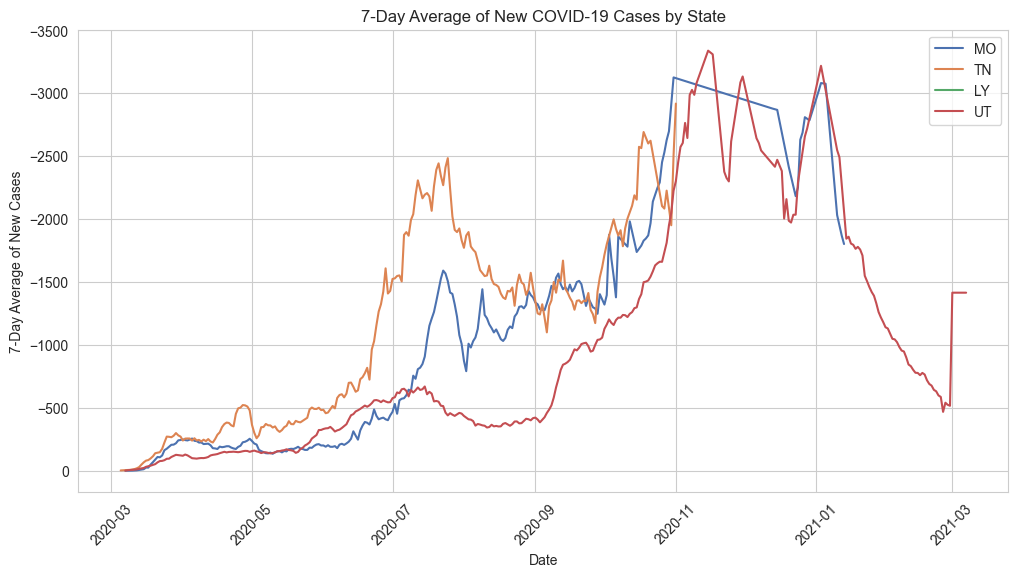

In [105]:
plot_cases_over_time(df, ['MO', 'TN', 'LY', 'UT'])    

# **Análisis Exploratorio Univariante**

El análisis univariante es una técnica estadística que se utiliza para analizar y describir una variable individual en un conjunto de datos. En lugar de examinar las relaciones entre múltiples variables, el análisis univariante se enfoca en comprender las características y propiedades de una sola variable a la vez.

El análisis univariante puede incluir varias técnicas y medidas, como:

1. Medidas de tendencia central: Estas medidas, como la media, la mediana y la moda, se utilizan para describir el valor central o típico de una variable.

2. Medidas de dispersión: Estas medidas, como la desviación estándar y el rango, se utilizan para describir cuánto se dispersan los valores de una variable alrededor de la medida central.

3. Gráficos de distribución: Los histogramas, diagramas de caja y bigotes, y gráficos de densidad son ejemplos de gráficos utilizados en el análisis univariante para visualizar la distribución de una variable y detectar patrones o formas específicas.

4. Análisis de frecuencia: Este análisis implica contar y resumir la frecuencia de diferentes valores o categorías de una variable. Se puede utilizar para identificar valores atípicos, valores más comunes o patrones de frecuencia.

5. Pruebas de hipótesis: En el análisis univariante, también se pueden realizar pruebas estadísticas para evaluar si hay diferencias significativas entre grupos o categorías de una variable.

El análisis univariante es una etapa importante en cualquier análisis de datos, ya que proporciona una comprensión inicial y detallada de una variable individual. Ayuda a resumir y describir las características clave de una variable, identificar patrones o tendencias y detectar valores atípicos o anómalos.

* Estadísticas Descriptivas

In [106]:
# Se eliminan las columnas númericas que no interesan para las estadisticas 
df_num = df.drop(['date','state'],axis=1)
df_num.head(2)

,positive,positiveIncrease,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate,new_deaths,deaths_7day_avg,new_cases,cases_7day_avg
0,165155.96926,0,848224.622047,9262.762478,3682.216859,2.186936e+06,2.763952,9.164449,-25.918134,-26.108872,-1400.29105,-1415.007100
1,0.00000,0,848224.622047,9262.762478,3682.216859,2.186936e+06,2.763952,9.164449,-25.918134,-26.108872,0.00000,-0.285714


In [107]:
df_num.describe().round(2)

,positive,positiveIncrease,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate,new_deaths,deaths_7day_avg,new_cases,cases_7day_avg
count,12586.00,12586.00,12586.00,12586.00,12586.00,12586.00,12586.00,12586.00,12586.00,12586.00,12586.0,12586.00
mean,54480.23,486.22,525121.00,6393.65,1270.49,756661.91,2.31,8.20,-8.92,-9.80,-509.3,-551.40
std,72782.02,627.08,415640.86,4072.91,1602.42,928189.99,1.24,2.18,11.60,10.58,636.4,638.84
min,0.00,-400.00,0.00,1.00,0.00,0.00,0.00,2.96,-63.00,-61.29,-3374.0,-3342.57
25%,2170.00,25.00,93078.00,2146.00,83.00,46363.50,1.42,6.73,-14.00,-15.57,-798.0,-859.14
50%,19843.50,212.00,537406.00,9262.76,608.00,398371.50,2.02,9.16,-4.00,-5.86,-234.0,-293.21
75%,87321.50,748.00,848224.62,9262.76,1859.00,1127901.00,2.79,9.16,0.00,-1.14,-31.0,-50.86
max,429177.00,3238.00,1851665.00,18764.00,8832.00,5428688.00,6.25,12.89,24.00,6.57,400.0,57.14


    Conclusiones Generales

    * Variabilidad Significativa: Hay una gran variabilidad en todas las variables, especialmente en los casos positivos, negativos y resultados de pruebas. Esto puede reflejar diferencias en la magnitud de la pandemia en diferentes regiones o en diferentes momentos.

    * Tasas de Mortalidad y Hospitalización: Las tasas de mortalidad y hospitalización tienen una variabilidad moderada, pero en general parecen estar bajo control, con una tasa de mortalidad promedio del 2.32% y una tasa de hospitalización del 8.14%.

    * Casos Extremos: Existen observaciones con valores extremos, como casos positivos y negativos muy altos, o incluso cero, lo cual sugiere que en algunas áreas o periodos la pandemia tuvo un impacto drásticamente diferente.
    
    Esta información puede ser útil para analizar tendencias y disparidades en el impacto de la pandemia, así como para orientar futuras políticas de salud.

* Visualización con Gráficos de Densidad

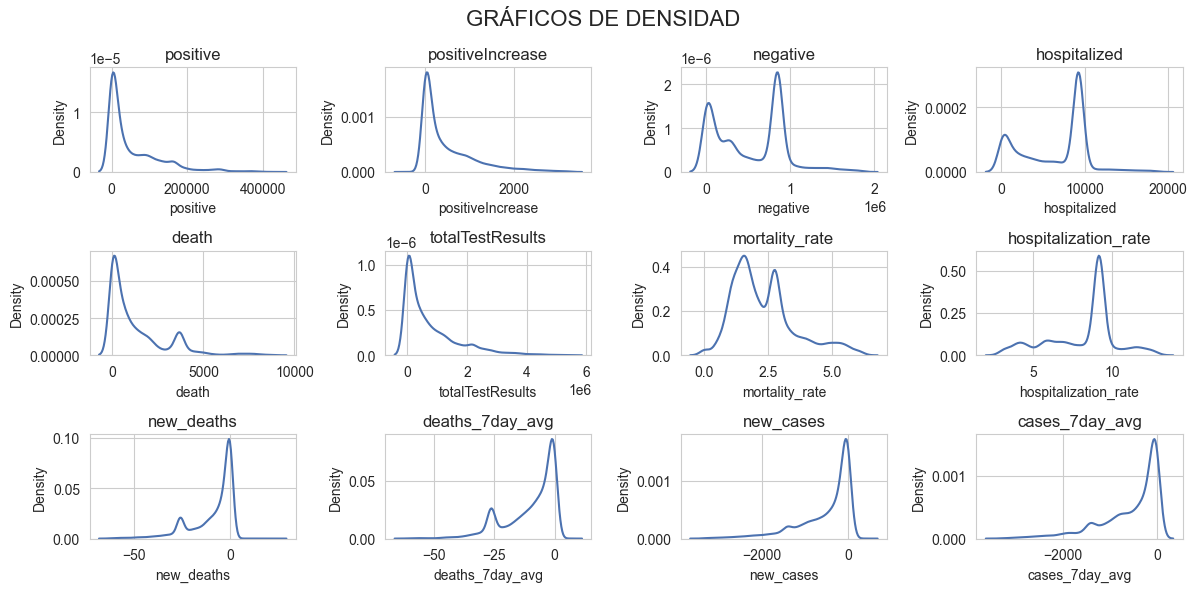

In [108]:
numeric_columns = df_num.select_dtypes(include=np.number).columns.to_list()
num_plots = len(numeric_columns)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))


for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols

    axs[row, col].set_title(f'{column}')
    sns.kdeplot(data=df, x=column, ax=axs[row, col])
    
# Eliminar subparcelas vacías si es necesario
if num_plots % num_cols != 0:
    fig.delaxes(axs[-1, -1])
    
# Agregar título general a la figura
plt.suptitle('GRÁFICOS DE DENSIDAD', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.show()

    Conclusiones Generales

    * Sesgo a la Derecha en Varias Variables: Variables como casos positivos, negativos, hospitalizaciones, muertes y resultados de pruebas muestran un sesgo a la derecha, lo que sugiere que la mayoría de las observaciones están en los valores más bajos, con algunas observaciones en valores mucho más altos.

    * Distribuciones Bimodales: Las distribuciones de los casos negativos y la tasa de mortalidad parecen ser bimodales, lo que indica que existen dos subgrupos dentro de los datos, posiblemente reflejando diferencias entre regiones o períodos de tiempo.

    * Colas Largas: En varias distribuciones, especialmente en casos positivos, muertes y resultados de pruebas, se observan colas largas hacia valores altos, indicando la presencia de valores extremos que podrían ser importantes para un análisis más detallado.
    
    Estos patrones pueden ayudar a identificar tendencias, anomalías y diferencias entre distintos grupos o periodos de tiempo en los datos, lo que podría ser útil para guiar la toma de decisiones y análisis más profundos.

* Histogramas para cada varible numérica en subplots

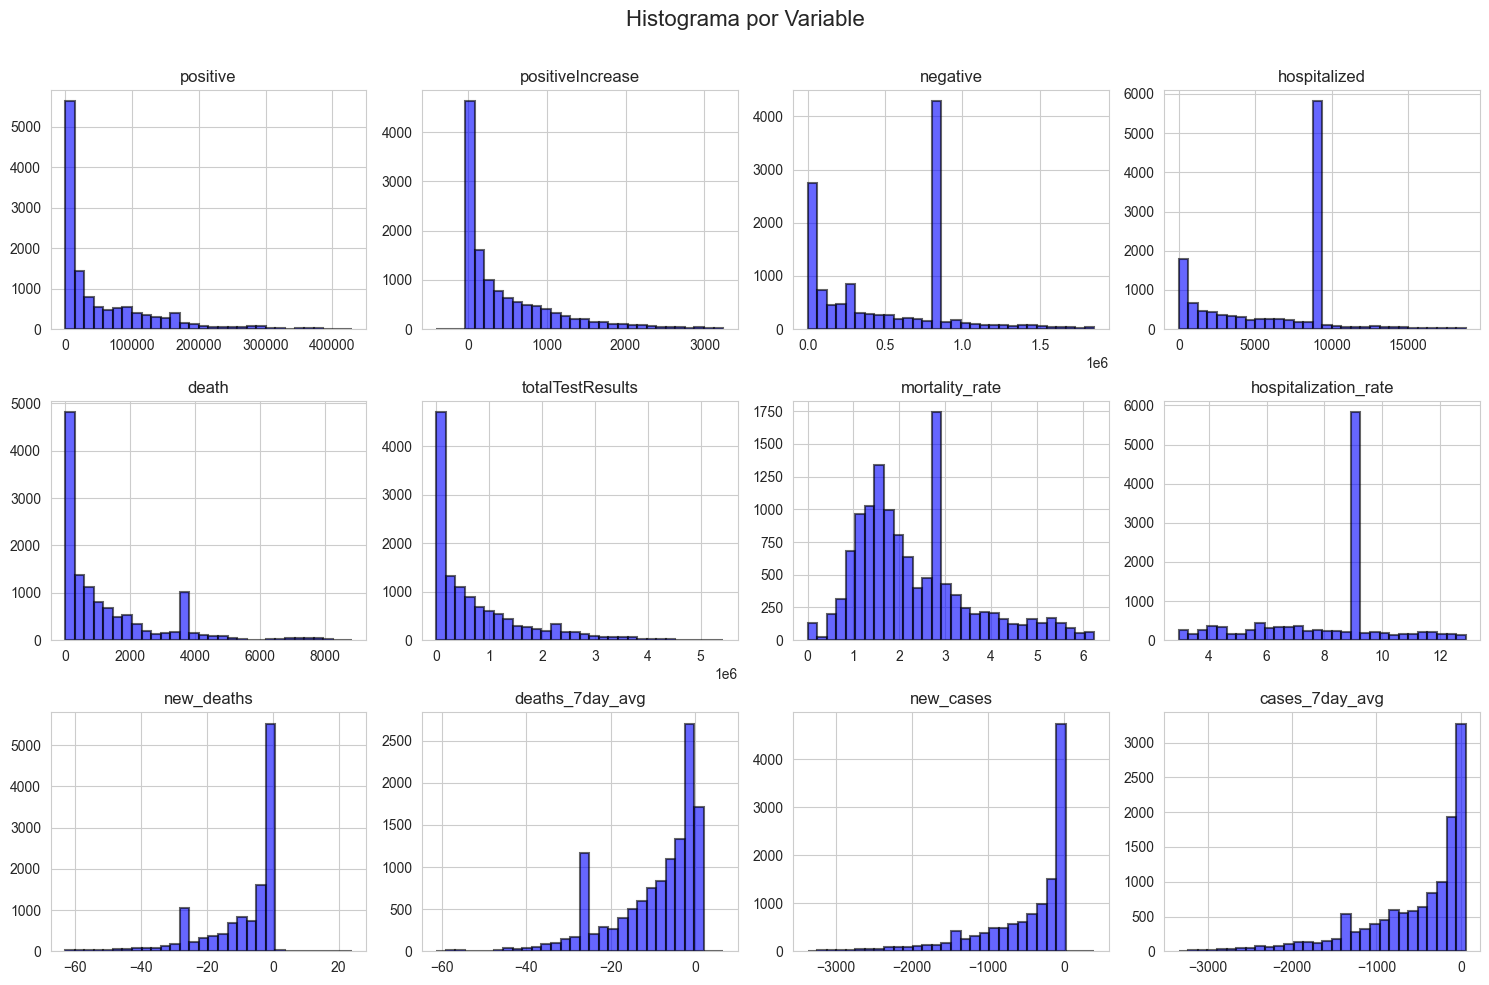

In [109]:
# Graficar los histogramas en subplots
df_num.hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(15, 10), layout=(3, 4))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar título general
plt.suptitle('Histograma por Variable', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=0.9)

# Mostrar los histogramas
plt.show()

    Conclusiones Generales

    * Sesgo a la Derecha en la Mayoría de las Variables: La mayoría de las variables, como casos positivos, negativos, hospitalizaciones, muertes y resultados de pruebas, muestran distribuciones sesgadas a la derecha, lo que sugiere que la mayoría de las observaciones tienen valores bajos, pero hay algunas con valores muy altos.

    * Distribuciones Bimodales: Las distribuciones de los casos negativos y la tasa de mortalidad muestran una posible bimodalidad, lo que sugiere la presencia de subgrupos en los datos que podrían reflejar diferencias geográficas, temporales o demográficas.

    * Variabilidad en la Tasa de Mortalidad y Hospitalización: Aunque hay concentraciones alrededor de ciertos valores, estas tasas también muestran variabilidad significativa entre las observaciones, lo que sugiere diferencias en la respuesta a la pandemia o en la gravedad de los casos en distintas regiones o periodos de tiempo.
    
    En resumen, los histogramas reflejan patrones similares a los gráficos de densidad, confirmando la concentración de datos en los valores bajos para la mayoría de las variables, pero también mostrando la existencia de subgrupos o valores extremos que podrían ser de interés para un análisis más profundo.

# **Visualización histórico de Fecha**

* Mediante está visualización se puede observar si existe estacionalidad en las 'Tasa de Mortalidad' y 'Tasa de Hospitalización' en el 
período (01/2020 a 03/2021)

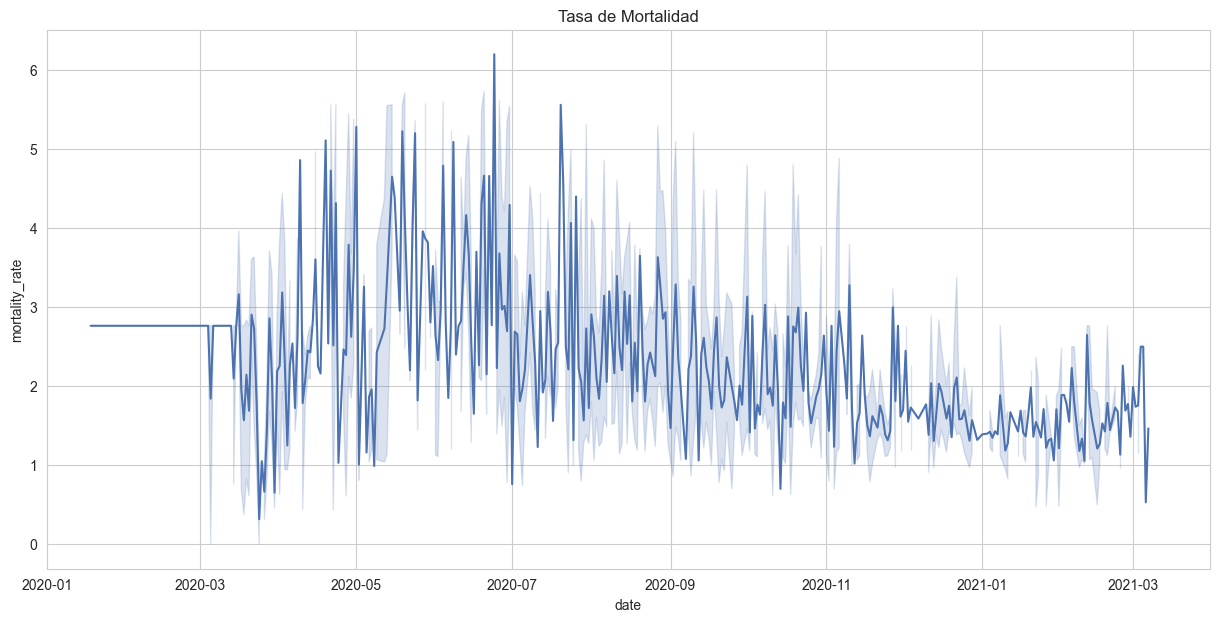

In [110]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(15,7))
    
    sns.lineplot(data=df.sample(1000), x=column, y='mortality_rate')
    plt.title('Tasa de Mortalidad')
    plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-03-31'))
    plt.show()

    Conclusión General
    
    El gráfico muestra una alta volatilidad en la tasa de mortalidad a lo largo del tiempo, con picos que reflejan momentos críticos de la pandemia y una tendencia general a la baja hacia 2021, posiblemente indicando mejoras en la respuesta global ante la pandemia. Sin embargo, las fluctuaciones constantes subrayan la complejidad de la situación y la variabilidad en la capacidad de respuesta en diferentes periodos y regiones.

In [111]:

# Agrupar por semana para análisis de tendencias
df['week'] = df['date'].dt.to_period('W')
df_weekly = df.groupby(['state', 'week']).agg({
    'positive': 'sum',
    'death': 'sum',
    'hospitalized': 'sum'
}).reset_index()

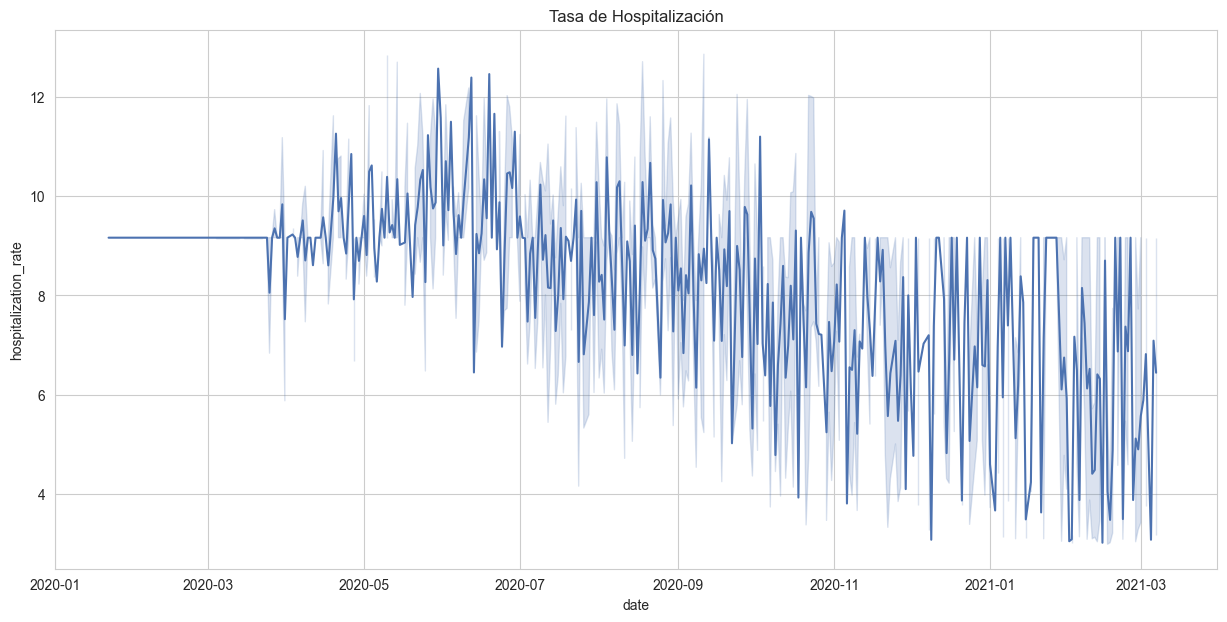

In [112]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(15,7))
    
    sns.lineplot(data=df.sample(1000), x=column, y='hospitalization_rate')
    plt.title('Tasa de Hospitalización')
    plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-03-31'))
    plt.show()

    Conclusión general

    La tasa de hospitalización durante la pandemia de COVID-19 mostró una alta variabilidad con múltiples picos a lo largo de 2020, lo que refleja las fluctuaciones en la severidad de la pandemia y posibles cambios en las políticas de salud o capacidad hospitalaria. 
    
    Aunque hubo un ligero descenso hacia finales de 2020, la tasa no presentó una tendencia clara y estuvo marcada por una considerable incertidumbre. Esto sugiere que la situación fue altamente dinámica y sujeta a múltiples factores contextuales a lo largo del año.

In [113]:
# Asegurarnos de que la columna 'date' es de tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Crear columna 'week' basada en la fecha
df['week'] = df['date'].dt.to_period('W')

In [114]:
# Agrupar por semana para análisis de tendencias
df['week'] = df['date'].dt.to_period('W')
df_weekly = df.groupby(['state', 'week']).agg({
    'positive': 'sum',
    'death': 'sum',
    'hospitalized': 'sum'
}).reset_index()

# ANÁLISIS BIVARIANTE

El análisis bivariante se utiliza para examinar la relación o asociación entre dos variables en un conjunto de datos.

El análisis bivariante puede ser útil para:

1. Identificar correlaciones: El análisis bivariante permite determinar si existe una relación entre dos variables y si esa relación es positiva, negativa o no existe. Esto puede ayudar a comprender cómo una variable afecta a la otra y a identificar patrones o tendencias.

2. Realizar pruebas de hipótesis: El análisis bivariante puede usarse para evaluar si hay diferencias significativas entre dos grupos o categorías en función de una variable. Esto puede ayudar a determinar si una variable tiene un impacto estadísticamente significativo en otra variable.

3. Visualizar la relación: El análisis bivariante a menudo se representa mediante gráficos, como gráficos de dispersión, diagramas de cajas y bigotes, o gráficos de barras. Estos gráficos permiten visualizar la relación entre las dos variables y pueden revelar patrones o tendencias visuales.

4. Predecir valores: El análisis bivariante puede ayudar a predecir valores de una variable en función de otra variable. 

#### **Gráficos de Dispersión**

* Analizar la relación entre las Muertes y el resto de variables

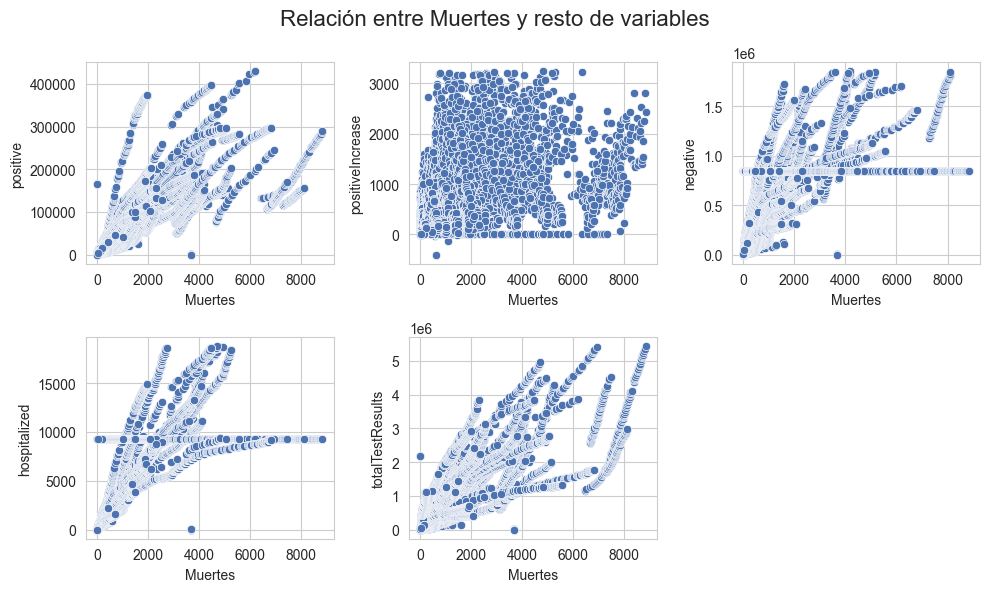

In [116]:
selected_columns = ['positive', 'positiveIncrease','negative', 'hospitalized', 'totalTestResults']

num_plots = len(selected_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Asegurarse de que 'axes' sea un arreglo bidimensional, incluso si num_rows o num_cols es 1
if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if num_cols == 1:
    axes = np.expand_dims(axes, axis=1)

for i, column in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.scatterplot(data=df, x=df['death'], y=column, ax=ax)

    ax.set_xlabel('Muertes')
    ax.set_ylabel(column)

# Eliminar subparcelas vacías si es necesario
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Agregar título general a la figura
plt.suptitle('Relación entre Muertes y resto de variables', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=0.9)

plt.tight_layout()
plt.show()

    Conclusión general

    * Correlación Positiva: Existe una correlación positiva entre el número de muertes y las otras variables. Esto es intuitivo, ya que a medida que aumentan los casos positivos, hospitalizaciones y pruebas realizadas, es esperable que también aumente el número de muertes.

    * Relación Causal: Aunque la gráfica muestra una correlación, no establece una relación causal. Es decir, no podemos afirmar con certeza que un aumento en los casos positivos cause un aumento en las muertes. Podría haber otras variables o factores subyacentes que estén influyendo en ambos.

    * Complejidad de la Relación: La relación entre las variables parece ser más compleja que una simple relación lineal. Otros factores, como la edad de la población, la disponibilidad de cuidados intensivos, las medidas de salud pública implementadas, etc., podrían estar moderando esta relación.

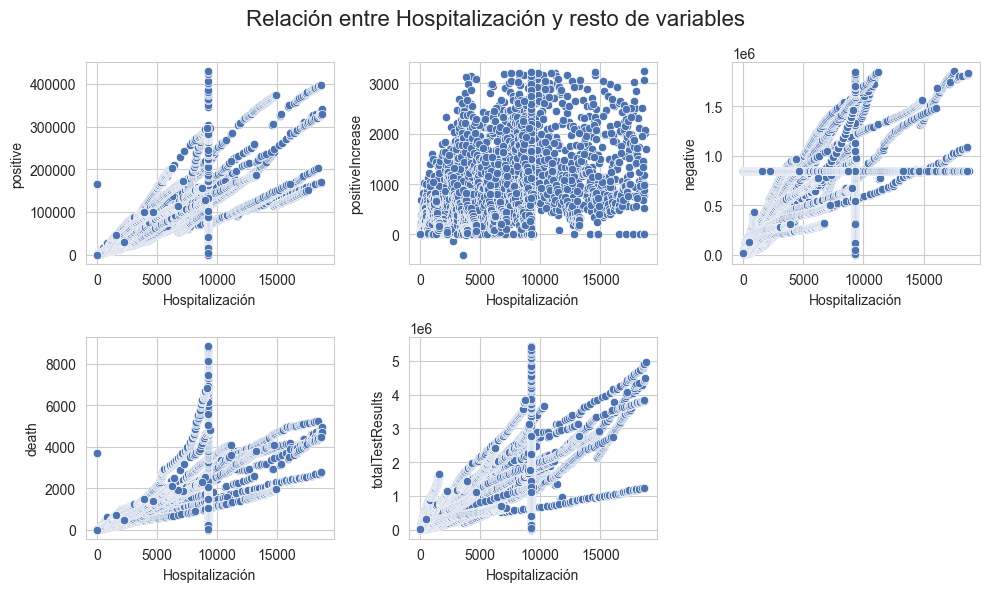

In [117]:
selected_columns = ['positive', 'positiveIncrease', 'negative', 'death', 'totalTestResults']

num_plots = len(selected_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Asegurarse de que 'axes' sea un arreglo bidimensional, incluso si num_rows o num_cols es 1
if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if num_cols == 1:
    axes = np.expand_dims(axes, axis=1)

for i, column in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.scatterplot(data=df, x=df['hospitalized'], y=column, ax=ax)

    ax.set_xlabel('Hospitalización')
    ax.set_ylabel(column)

# Eliminar subparcelas vacías si es necesario
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Agregar título general a la figura
plt.suptitle('Relación entre Hospitalización y resto de variables', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=0.9)

plt.tight_layout()
plt.show()


* Relación entre Hospitalización y resto de variables

    Conclusión general

    * Dispersión: Existe bastante dispersión en todos los gráficos, lo que sugiere que las relaciones no son perfectas. Esto significa que hay otros factores en juego que podrían influir en las hospitalizaciones y las otras variables.

    * Concentración de puntos: Se observa una concentración considerable de puntos alrededor de valores más bajos de la tasa de hospitalización, lo que puede indicar que la mayoría de los datos se concentran en niveles más bajos de hospitalización.

    En resumen, el gráfico sugiere que a medida que la tasa de hospitalización aumenta, también lo hacen el número de casos positivos, las pruebas realizadas, y, en menor medida, el número de muertes. Estas relaciones son lógicas en el contexto de una pandemia, donde un aumento en la gravedad de la situación (más hospitalizaciones) usualmente se acompaña de más pruebas, más casos positivos, y desafortunadamente, más muertes.

####  **Análisis de distribuciones**

* Casos positivos por Estado

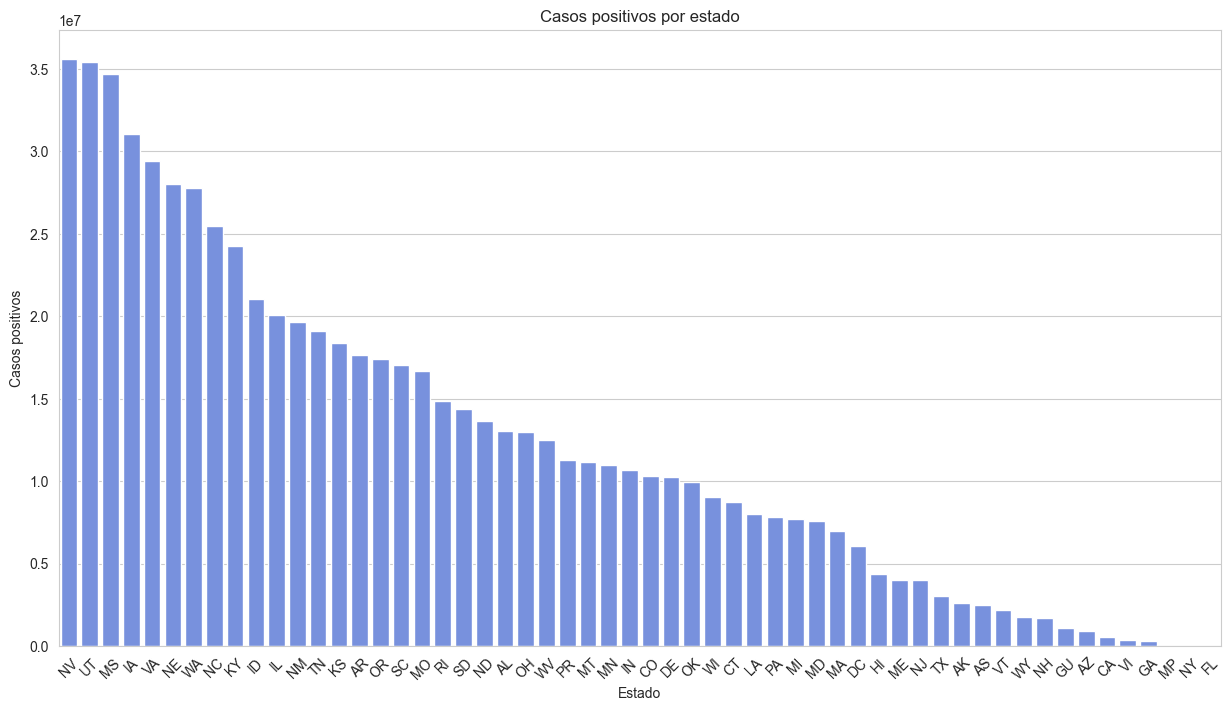

In [118]:
# Agrupamos por estado y sumamos los casos positivos
df_state = df.groupby('state').agg({
    'positive': 'sum'
}).reset_index()

# Gráfico de barras para mostrar los casos positivos acumulados por estado usando Seaborn y Matplotlib
plt.figure(figsize=(15, 8))
sns.set_palette('coolwarm')

# Ordenamos los estados por el número de casos positivos acumulados
df_state_sorted = df_state.sort_values(by='positive', ascending=False)

# Creamos el gráfico de barras
sns.barplot(x='state', y='positive', data=df_state_sorted, order=df_state_sorted['state'])

plt.title('Casos positivos por estado')
plt.xlabel('Estado')
plt.ylabel('Casos positivos')
plt.xticks(rotation=45)
plt.show()

    Análisis del Gráfico: Casos Positivos por Estado

    El gráfico muestra una clara disparidad en el número de casos positivos de COVID-19 entre los diferentes estados.
    Conclusiones Principales:

    * Alta Variabilidad entre Estados: Es evidente una gran diferencia en el número de casos positivos entre los distintos estados. Algunos estados presentan cifras significativamente más altas que otros.

    * Concentración de Casos: Un reducido número de estados concentra una gran proporción de los casos totales. Los primeros estados en el gráfico representan una porción considerable del total de casos a nivel nacional.

    * Distribución Desigual: La distribución de los casos positivos no es homogénea a lo largo del territorio. Existen estados con un número muy elevado de casos y otros con cifras mucho más bajas.

    Posibles Factores Influyentes: Esta disparidad podría estar influenciada por diversos factores como:
        - Densidad poblacional: Estados más poblados suelen tener un mayor número de casos.
        - Medidas de control: La implementación temprana y efectiva de medidas de control como el distanciamiento social, el uso de mascarillas y las campañas de vacunación pueden influir en la propagación del virus.
        - Factores socioeconómicos: Desigualdades en el acceso a la atención médica, condiciones de vivienda y otras variables socioeconómicas pueden afectar la incidencia de la enfermedad.
        - Variantes del virus: La presencia de variantes más contagiosas puede explicar brotes más severos en ciertas regiones.

* Tasa de Mortalidad por Estado

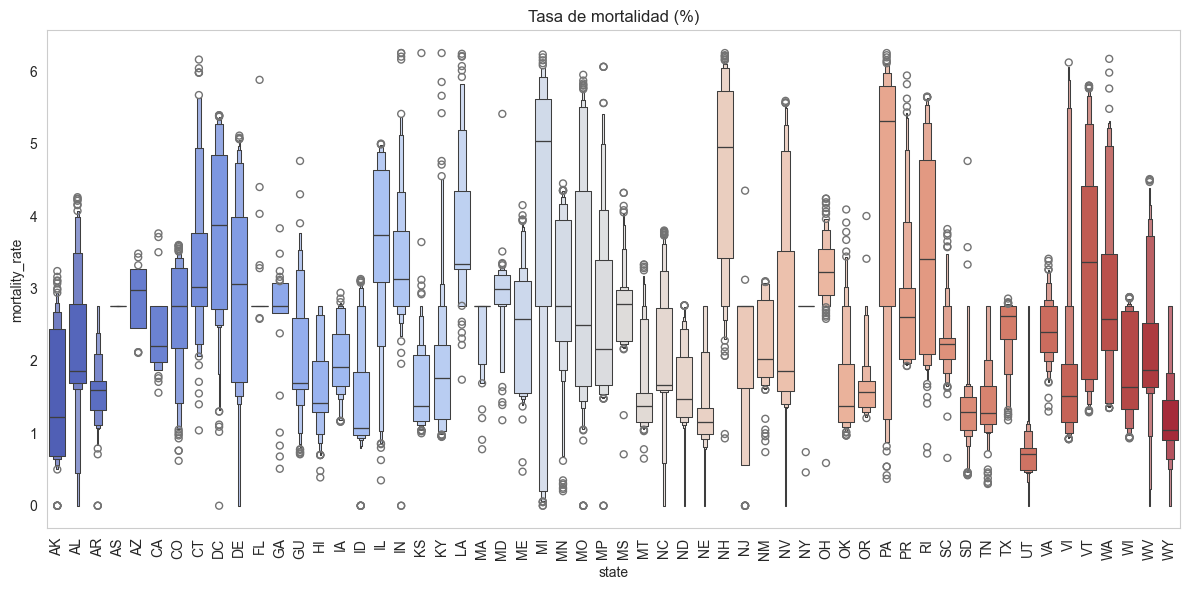

In [119]:
# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear un boxenplot usando Seaborn
sns.boxenplot(data=df, x='state', y='mortality_rate',  palette='coolwarm')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Agregar título y etiquetas a los ejes
ax.set_title('Distribución de tasas de mortalidad por estado', fontsize=16, pad=20)
ax.set_title('Estado', fontsize=12)
ax.set_title('Tasa de mortalidad (%)', fontsize=12)

# Quitar las líneas de la cuadrícula
ax.grid(False)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

    Conclusión general

    El gráfico de caja y bigotes revela una gran heterogeneidad en las tasas de mortalidad a nivel estatal. 
    
    Esta variabilidad sugiere que existen factores complejos y multidimensionales que influyen en la mortalidad por COVID-19.
    
    Un análisis más profundo de estos datos puede ayudar a identificar las áreas donde se necesitan mayores esfuerzos para reducir la mortalidad y mejorar los resultados de salud.

#### **Visualización de Tendencias temporales**

* Casos semanales positivos a nivel nacional

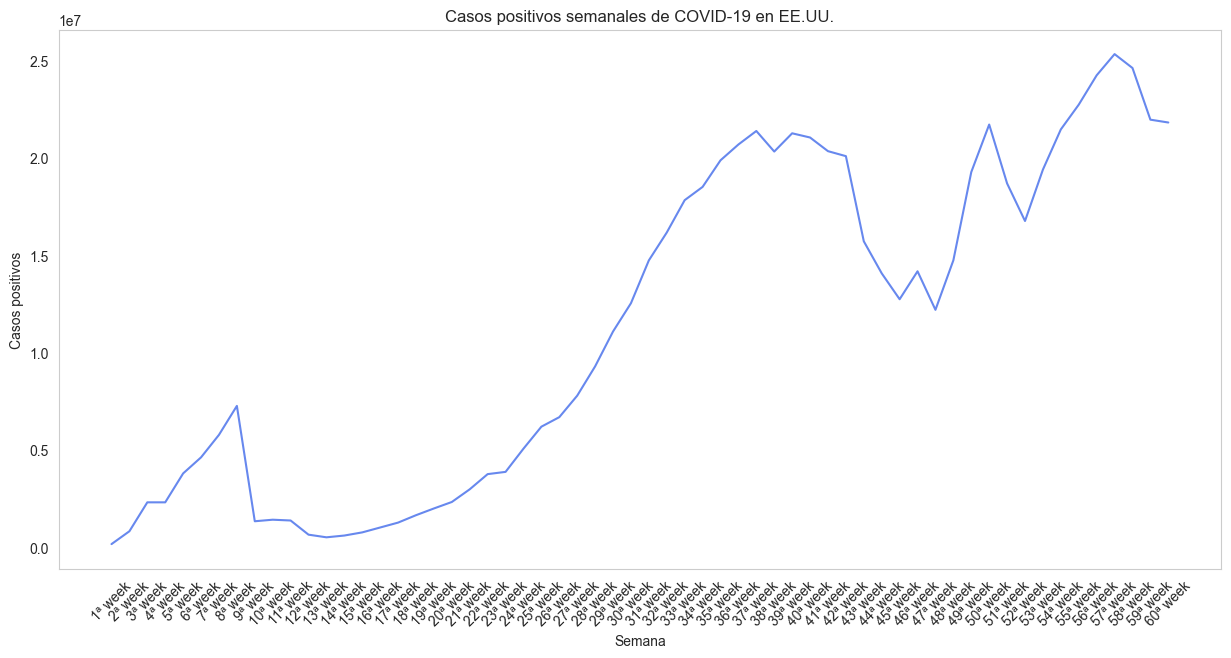

In [120]:
# Agrupamos por semana para obtener el total de casos positivos a nivel nacional
national_weekly = df_weekly.groupby('week')['positive'].sum().reset_index()

# Convertimos la columna 'week' a un formato adecuado para Seaborn (puede ser string o datetime)
national_weekly['week'] = national_weekly['week'].astype(str)

# Gráfico de líneas usando Seaborn
plt.figure(figsize=(15, 7))
sns.lineplot(data=national_weekly, x='week', y='positive')

plt.title('Casos positivos semanales de COVID-19 en EE.UU.')
plt.xlabel('Semana')
plt.ylabel('Casos positivos')
plt.xticks(rotation=45)

# Generar nuevas etiquetas "semana1", "semana2", ...
new_labels = [f'{i+1}ª week' for i in range(len(national_weekly))]

# Quitar las líneas de división
plt.grid(False)

# Aplicar las nuevas etiquetas al eje x 
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)
plt.show()

    Conclusión General

    * Aumento inicial y posterior estabilización: El gráfico muestra un aumento significativo en los casos positivos semanales de COVID-19 en Estados Unidos durante las primeras semanas representadas. Sin embargo, a partir de cierto punto, se observa una tendencia hacia la estabilización, con fluctuaciones pero sin un crecimiento exponencial continuo.

    * Múltiples picos: A lo largo del período representado, se identifican varios picos en los casos positivos, lo que sugiere la ocurrencia de olas o brotes epidémicos en diferentes momentos.

* Tasa de Crecimiento diario en los Estados más afectados

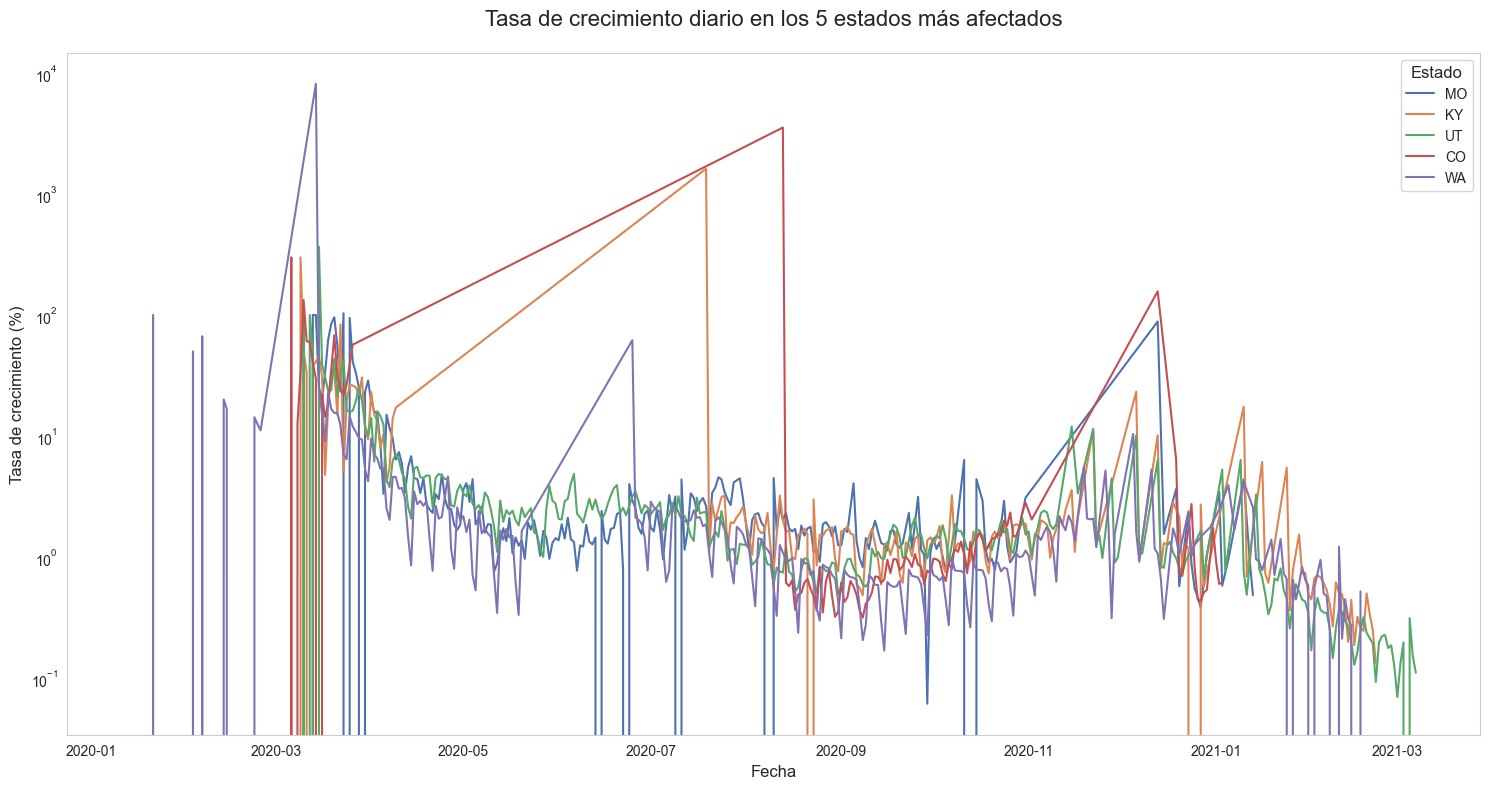

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'date', 'state' y 'positive'

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("deep")

# Calcular tasa de crecimiento diario
df['growth_rate'] = df.groupby('state')['positive'].pct_change() * 100

# Convertir la columna 'date' a datetime si aún no lo está
df['date'] = pd.to_datetime(df['date'])

# Filtrar datos hasta noviembre de 2020
df_filtered = df[df['date'] <= '2021-03-31']

# Obtener los 5 estados más afectados
top_5_states = df_filtered.groupby('state')['positive'].max().nlargest(5).index

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))

# Gráfico de líneas de tasa de crecimiento para los 5 estados más afectados con escala logarítmica en el eje y
for state in top_5_states:
    state_data = df_filtered[df_filtered['state'] == state]
    sns.lineplot(x='date', y='growth_rate', data=state_data, label=state, ax=ax)

# Personalizar el gráfico
ax.set_title('Tasa de crecimiento diario en los 5 estados más afectados', fontsize=16, pad=20)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Tasa de crecimiento (%)', fontsize=12)

# Configurar escala logarítmica en el eje y
ax.set_yscale('log')

# Agregar una línea horizontal en y=0
ax.axhline(y=0, color='gray', linestyle='--')

# Quitar las líneas de la cuadrícula
ax.grid(False)

# Ajustar la leyenda
ax.legend(title='Estado', title_fontsize='12', fontsize='10', loc='upper right')

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

    Conclusiones Generales

    * Variabilidad entre Estados: A pesar de las tendencias generales, existe una gran variabilidad en la evolución de la pandemia entre los cinco estados.
    Impacto de las Medidas de Control: La desaceleración y estabilización de las tasas de crecimiento en la mayoría de los estados sugieren que las medidas de salud pública implementadas, como el distanciamiento social y las restricciones de movilidad, fueron efectivas en controlar la propagación del virus.

    * Múltiples Olas Epidémicas: La presencia de múltiples picos en la tasa de crecimiento indica que la pandemia no siguió un patrón lineal y que hubo varias olas epidémicas en diferentes momentos.

    * Factores Locales: Las diferencias en la evolución de la pandemia entre los estados pueden atribuirse a una variedad de factores, como la densidad poblacional, la composición demográfica, las políticas de salud pública y la implementación de medidas de control.

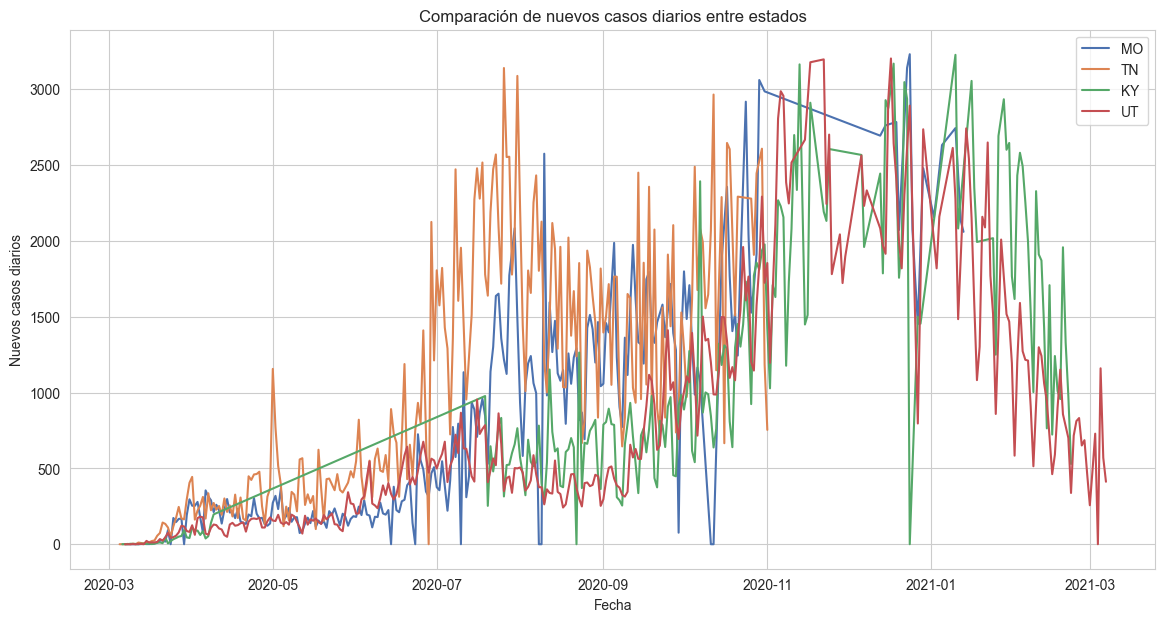

In [122]:
# Selección de algunos estados para comparar la incidencia
states = ['MO', 'TN', 'KY', 'UT']

plt.figure(figsize=(14, 7))

for state in states:
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['positiveIncrease'], label=state)

plt.title('Comparación de nuevos casos diarios entre estados')
plt.xlabel('Fecha')
plt.ylabel('Nuevos casos diarios')
plt.legend()
plt.grid(True)
plt.savefig('comparacion de nuevos casos diarios estados')
plt.show()

#### **Análisis de Correlación**

Podemos analizar la relación entre las diferentes variables

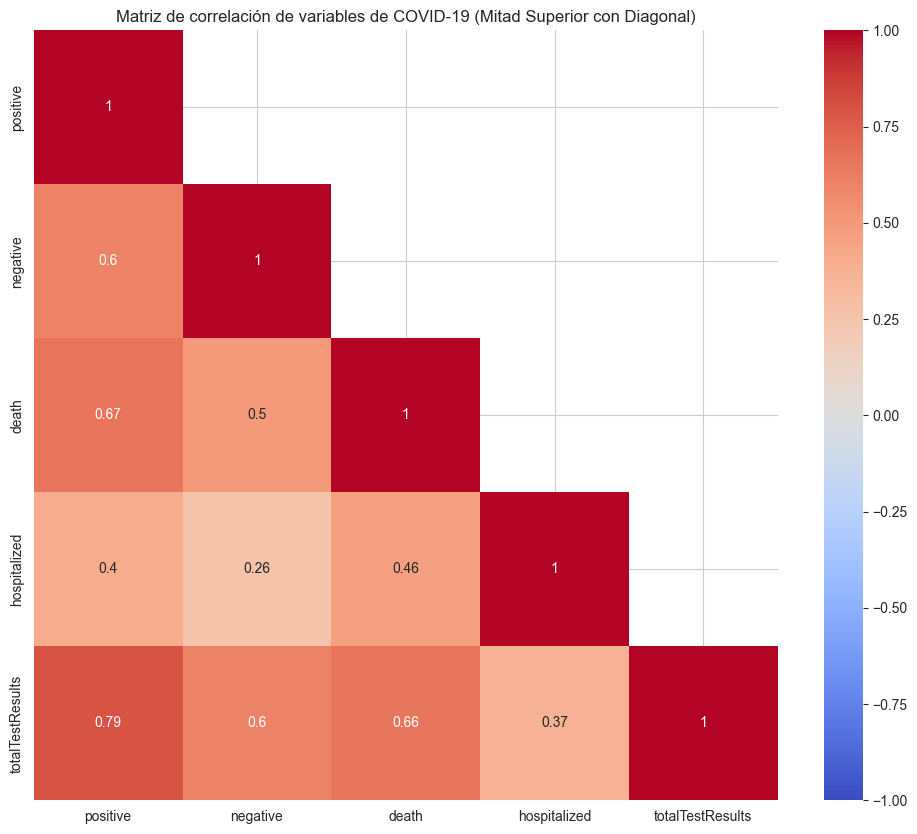

In [124]:

# Seleccionar variables numéricas relevantes
numeric_vars = ['positive', 'negative', 'death', 'hospitalized', 'totalTestResults']

# Crear matriz de correlación
corr_matrix = df[numeric_vars].corr()

# Crear una máscara para ocultar la mitad inferior de la matriz, pero dejando visible la diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Crear mapa de calor con anotaciones
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Matriz de correlación de variables de COVID-19 (Mitad Superior con Diagonal)')
plt.show()


In [125]:
from scipy.stats import spearmanr

# Seleccionar variables numéricas relevantes
numeric_vars = ['positive', 'negative', 'death', 'hospitalized', 'totalTestResults']

# Crear matriz de correlación de Spearman
corr_matrix_spearman = df[numeric_vars].corr(method='spearman')
print(f"*** MATRIZ DE CORRELACIÓN DE SPEARMAN ***\n {corr_matrix_spearman}")

# Calcular y mostrar coeficientes de correlación de Spearman con p-valores
print("\n*** COEFICIENTES DE CORRELACIÓN DE SPEARMAN ***")
for i in range(len(numeric_vars)):
    for j in range(i+1, len(numeric_vars)):
        corr, p_value = spearmanr(df[numeric_vars[i]], df[numeric_vars[j]])
        print(f"Entre '{numeric_vars[i]}' y '{numeric_vars[j]}': {corr:.3f} (p-value: {p_value:.4f})")

*** MATRIZ DE CORRELACIÓN DE SPEARMAN ***
                   positive  negative     death  hospitalized  totalTestResults
positive          1.000000  0.653413  0.700772      0.173934          0.845022
negative          0.653413  1.000000  0.559518      0.159684          0.649940
death             0.700772  0.559518  1.000000      0.366025          0.657897
hospitalized      0.173934  0.159684  0.366025      1.000000          0.133860
totalTestResults  0.845022  0.649940  0.657897      0.133860          1.000000

*** COEFICIENTES DE CORRELACIÓN DE SPEARMAN ***
Entre 'positive' y 'negative': 0.653 (p-value: 0.0000)
Entre 'positive' y 'death': 0.701 (p-value: 0.0000)
Entre 'positive' y 'hospitalized': 0.174 (p-value: 0.0000)
Entre 'positive' y 'totalTestResults': 0.845 (p-value: 0.0000)
Entre 'negative' y 'death': 0.560 (p-value: 0.0000)
Entre 'negative' y 'hospitalized': 0.160 (p-value: 0.0000)
Entre 'negative' y 'totalTestResults': 0.650 (p-value: 0.0000)
Entre 'death' y 'hospitalized':

    Interpretación General

    * Confirmación de Hipótesis: Los resultados confirman la expectativa de que un mayor número de casos positivos se asocie con un mayor número de muertes y hospitalizaciones.
    
    * Complejidad de las Relaciones: Aunque las correlaciones son significativas, es importante recordar que la correlación no implica causalidad(p-value muy próximo a cero). Otros factores no medidos, como las políticas de salud pública, las características demográficas y las variantes del virus, podrían influir en estas relaciones.
    
    * Importancia de las Pruebas: La fuerte correlación entre los resultados totales de pruebas y otras variables subraya la importancia de las pruebas para detectar casos y monitorear la propagación de la enfermedad.
    
    * Necesidad de Análisis Multivariante: Para comprender mejor las relaciones entre estas variables y controlar el efecto de otros factores, sería recomendable realizar un análisis multivariante, como una regresión logística o un modelo de ecuaciones estructurales.

In [126]:
from scipy import stats

# Seleccionar los dos estados a comparar
state1 = 'UT'
state2 = 'NV'

# Filtrar los datos
data1 = df[df['state'] == state1]['mortality_rate']
data2 = df[df['state'] == state2]['mortality_rate']

# Realizar la prueba t
t_stat, p_value = stats.ttest_ind(data1, data2)

print('Estadístico t:', t_stat)
print('Valor p:', p_value)

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print('Hay evidencia estadística para rechazar la hipótesis nula. Las tasas de mortalidad son significativamente diferentes.')
else:
    print('No hay suficiente evidencia para rechazar la hipótesis nula. Las tasas de mortalidad pueden no ser significativamente diferentes.')

Estadístico t: -21.61209637673036
Valor p: 1.1189123080717162e-79
Hay evidencia estadística para rechazar la hipótesis nula. Las tasas de mortalidad son significativamente diferentes.


    Conclusión general:

    Los resultados de la prueba t indican que existe una diferencia significativa en las tasas de mortalidad entre los grupos comparados.

    Aunque la prueba t indica una diferencia significativa entre los dos grupos, es posible que otros factores no considerados en el análisis estén influyendo en los resultados.

## ANÁLISIS MULTIVARIANTE

El análisis multivariante se utiliza para explorar y comprender las relaciones complejas entre múltiples variables. Proporciona información valiosa para la toma de decisiones y la comprensión de los datos en diversas áreas de estudio.

Algunas de las aplicaciones comunes del análisis multivariante incluyen:

1. Análisis de componentes principales (PCA): Es una técnica que reduce la dimensionalidad de un conjunto de datos al transformar las variables originales en un conjunto más pequeño de componentes principales. Ayuda a identificar las variables más importantes y a visualizar la estructura del conjunto de datos.

2. Análisis de cluster: Permite agrupar objetos o individuos similares en grupos homogéneos según sus características. Ayuda a identificar patrones y segmentos en los datos.

3. Análisis de regresión múltiple: Examina la relación entre una variable dependiente y varias variables independientes. Ayuda a comprender el impacto de las variables independientes en la variable dependiente y a predecir valores futuros.

4. Análisis discriminante: Permite clasificar objetos en diferentes grupos basándose en un conjunto de variables predictoras. Ayuda a identificar las variables más discriminantes y a predecir la pertenencia a un grupo.

5. Análisis de series temporales: Examina las relaciones y patrones en datos secuenciales a lo largo del tiempo. Ayuda a predecir tendencias y patrones futuros.

6. Análisis de correspondencias: Explora las relaciones entre variables categóricas. Ayuda a identificar asociaciones y patrones entre las categorías.

# **Estandarización de variables**

- **StandardScaler**: de sklearn para estandarizar las variables numéricas principales.

In [127]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
df_scaled.head(2)

,positive,positiveIncrease,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate,new_deaths,deaths_7day_avg,new_cases,cases_7day_avg
0,1.520707,-0.775415,0.777393,0.704466,1.505106,1.540989,0.364673,0.444711,-1.466083,-1.54172,-1.400109,-1.351893
1,-0.748569,-0.775415,0.777393,0.704466,1.505106,1.540989,0.364673,0.444711,-1.466083,-1.54172,0.800311,0.862706


In [128]:
# Guardar los datos estandarizados para posteriores análisis
df_scaled.to_csv(ruta_nuevoCSV, index=False) 
